In [114]:
import pandas as pd
import numpy as np

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
df = pd.read_csv('/content/NZ_Alcohol_Consumption.csv')
df.head()

,DATE,Quarterly Alcohol Consumption in Megalitres
0,2000Q1,5.540
1,2000Q2,6.047
2,2000Q3,6.138
3,2000Q4,8.615
4,2001Q1,5.564


Moving Average (3) MAE: 0.78
Moving Average (3) MSE: 1.00
Moving Average (3) RMSE: 1.00
Moving Average (3) MAPE: 9.20%
Moving Average (3) Prediction Accuracy: 90.80%



<ipython-input-117-24b0fb0ab11a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'moving_average_{window_size}'] = moving_average_model(train['Quarterly Alcohol Consumption in Megalitres'], window_size)
<ipython-input-117-24b0fb0ab11a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'moving_average_{window_size}'] = moving_average_model(pd.concat([train['Quarterly Alcohol Consumption in Megalitres'].iloc[-window_size:], test['Quarterly Alcohol Consumption in Megalitres']]), window_size)


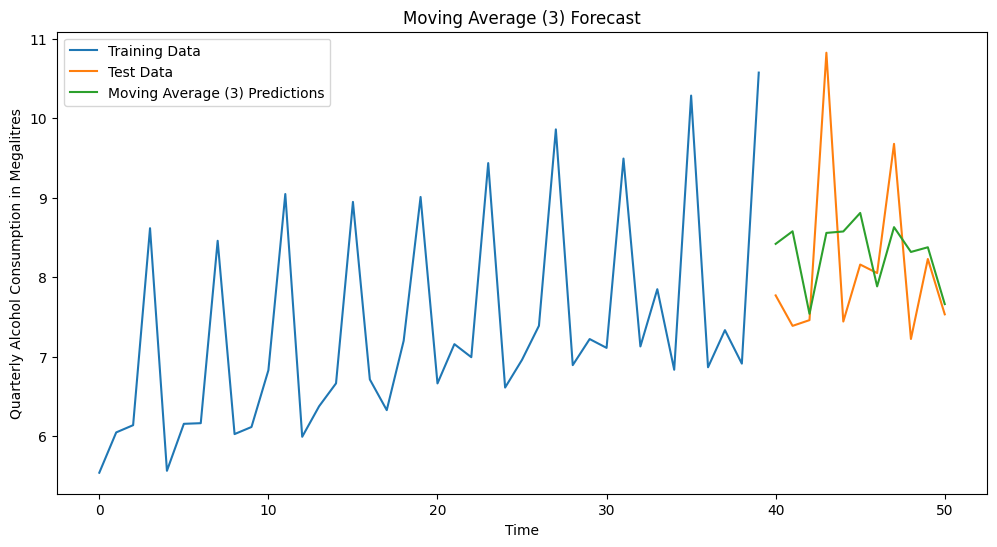

<ipython-input-117-24b0fb0ab11a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'moving_average_{window_size}'] = moving_average_model(train['Quarterly Alcohol Consumption in Megalitres'], window_size)
<ipython-input-117-24b0fb0ab11a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'moving_average_{window_size}'] = moving_average_model(pd.concat([train['Quarterly Alcohol Consumption in Megalitres'].iloc[-window_size:], test['Quarterly Alcohol Consumption in Megalitres']]), window_size)


Moving Average (5) MAE: 0.62
Moving Average (5) MSE: 0.67
Moving Average (5) RMSE: 0.82
Moving Average (5) MAPE: 7.34%
Moving Average (5) Prediction Accuracy: 92.66%



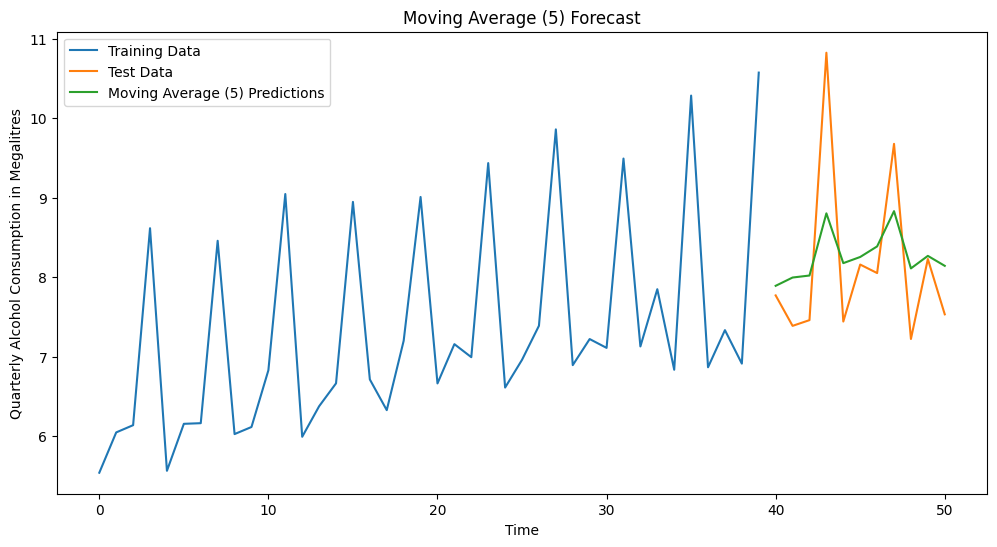

<ipython-input-117-24b0fb0ab11a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f'moving_average_{window_size}'] = moving_average_model(train['Quarterly Alcohol Consumption in Megalitres'], window_size)
<ipython-input-117-24b0fb0ab11a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'moving_average_{window_size}'] = moving_average_model(pd.concat([train['Quarterly Alcohol Consumption in Megalitres'].iloc[-window_size:], test['Quarterly Alcohol Consumption in Megalitres']]), window_size)


Moving Average (7) MAE: 0.77
Moving Average (7) MSE: 1.03
Moving Average (7) RMSE: 1.01
Moving Average (7) MAPE: 8.99%
Moving Average (7) Prediction Accuracy: 91.01%



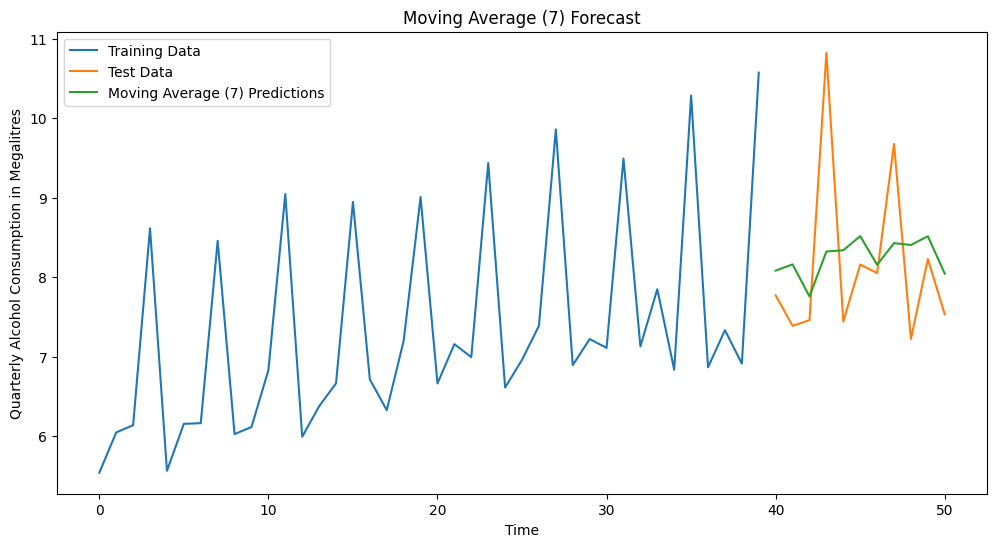

In [117]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Train-Test Split (80-20 split)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# 2. Create Moving Average Model
def moving_average_model(train_data, window_size):
    return train_data.rolling(window=window_size).mean()

# Loop over different window sizes (3, 5, and 7)
for window_size in [3, 5, 7]:
    # 3. Make Predictions on Test Data
    train[f'moving_average_{window_size}'] = moving_average_model(train['Quarterly Alcohol Consumption in Megalitres'], window_size)
    test[f'moving_average_{window_size}'] = moving_average_model(pd.concat([train['Quarterly Alcohol Consumption in Megalitres'].iloc[-window_size:], test['Quarterly Alcohol Consumption in Megalitres']]), window_size)

    # 4. Evaluate Prediction Accuracy
    mae_ma = mean_absolute_error(test['Quarterly Alcohol Consumption in Megalitres'], test[f'moving_average_{window_size}'])
    mse_ma = mean_squared_error(test['Quarterly Alcohol Consumption in Megalitres'], test[f'moving_average_{window_size}'])
    rmse_ma = np.sqrt(mse_ma)

    # Calculate MAPE
    mape_ma = np.mean(np.abs((test['Quarterly Alcohol Consumption in Megalitres'] - test[f'moving_average_{window_size}']) / test['Quarterly Alcohol Consumption in Megalitres'])) * 100

    # Calculate Prediction Accuracy
    prediction_accuracy = 100 - mape_ma

    print(f"Moving Average ({window_size}) MAE: {mae_ma:.2f}")
    print(f"Moving Average ({window_size}) MSE: {mse_ma:.2f}")
    print(f"Moving Average ({window_size}) RMSE: {rmse_ma:.2f}")
    print(f"Moving Average ({window_size}) MAPE: {mape_ma:.2f}%")
    print(f"Moving Average ({window_size}) Prediction Accuracy: {prediction_accuracy:.2f}%")
    print()

    # 5. Plot
    plt.figure(figsize=(12, 6))
    plt.plot(train['Quarterly Alcohol Consumption in Megalitres'], label='Training Data')
    plt.plot(test['Quarterly Alcohol Consumption in Megalitres'], label='Test Data')
    plt.plot(test[f'moving_average_{window_size}'], label=f'Moving Average ({window_size}) Predictions')
    plt.title(f'Moving Average ({window_size}) Forecast')
    plt.xlabel('Time')
    plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
    plt.legend()
    plt.show()


The Moving Average (5) model demonstrates the highest prediction accuracy among the three models, with a MAPE of 7.34% and a prediction accuracy of 92.66%. This indicates that the Moving Average (5) model provides the closest forecasts to the actual values in the dataset, making it the preferred choice for forecasting in this scenario.

In [138]:
df.head(20)

,DATE,Quarterly Alcohol Consumption in Megalitres,moving_average_3,moving_average_5,moving_average_7,smoothed_alpha_0.15,smoothed_alpha_0.3,smoothed_alpha_0.5
0,2000Q1,0.000000,NaN,NaN,NaN,5.540000,5.540000,5.540000
1,2000Q2,0.095986,NaN,NaN,NaN,5.616050,5.692100,5.793500
2,2000Q3,0.113215,5.908333,NaN,NaN,5.694342,5.825870,5.965750
3,2000Q4,0.582166,6.933333,NaN,NaN,6.132441,6.662609,7.290375
4,2001Q1,0.004544,6.772333,6.3808,NaN,6.047175,6.333026,6.427188
5,2001Q2,0.116433,6.778000,6.5038,NaN,6.063349,6.279618,6.291094
6,2001Q3,0.117948,5.960667,6.5270,6.317429,6.078296,6.244633,6.227047
7,2001Q4,0.552253,6.925000,6.9908,6.734143,6.435102,6.908343,7.342023
8,2002Q1,0.092011,6.882000,6.4730,6.731143,6.373737,6.643640,6.684012
9,2002Q2,0.108860,6.866000,6.5832,6.727857,6.334926,6.485048,6.399506


Overall, the increasing trend in the moving averages suggests a positive direction in the data, but additional analysis and context are needed to understand the underlying patterns fully. So we will move towards the Exponential Smoothening of Data, ARIMA and so on.

In [119]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define function to calculate moving average
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

# Compute moving averages for window sizes 3, 5, and 7
df['moving_average_3'] = moving_average(df['Quarterly Alcohol Consumption in Megalitres'], 3)
df['moving_average_5'] = moving_average(df['Quarterly Alcohol Consumption in Megalitres'], 5)
df['moving_average_7'] = moving_average(df['Quarterly Alcohol Consumption in Megalitres'], 7)

# Calculate MAE, MSE, and RMSE for moving average window size 3
mae_3 = mean_absolute_error(df['Quarterly Alcohol Consumption in Megalitres'][3:], df['moving_average_3'][3:])
mse_3 = mean_squared_error(df['Quarterly Alcohol Consumption in Megalitres'][3:], df['moving_average_3'][3:])
rmse_3 = np.sqrt(mse_3)

# Calculate MAE, MSE, and RMSE for moving average window size 5
mae_5 = mean_absolute_error(df['Quarterly Alcohol Consumption in Megalitres'][5:], df['moving_average_5'][5:])
mse_5 = mean_squared_error(df['Quarterly Alcohol Consumption in Megalitres'][5:], df['moving_average_5'][5:])
rmse_5 = np.sqrt(mse_5)

# Calculate MAE, MSE, and RMSE for moving average window size 7
mae_7 = mean_absolute_error(df['Quarterly Alcohol Consumption in Megalitres'][7:], df['moving_average_7'][7:])
mse_7 = mean_squared_error(df['Quarterly Alcohol Consumption in Megalitres'][7:], df['moving_average_7'][7:])
rmse_7 = np.sqrt(mse_7)

# Calculate MAPE for moving average window size 3
mape_3 = np.mean(np.abs((df['Quarterly Alcohol Consumption in Megalitres'][3:] - df['moving_average_3'][3:]) / df['Quarterly Alcohol Consumption in Megalitres'][3:])) * 100

# Calculate MAPE for moving average window size 5
mape_5 = np.mean(np.abs((df['Quarterly Alcohol Consumption in Megalitres'][5:] - df['moving_average_5'][5:]) / df['Quarterly Alcohol Consumption in Megalitres'][5:])) * 100

# Calculate MAPE for moving average window size 7
mape_7 = np.mean(np.abs((df['Quarterly Alcohol Consumption in Megalitres'][7:] - df['moving_average_7'][7:]) / df['Quarterly Alcohol Consumption in Megalitres'][7:])) * 100

# Calculate Prediction Accuracy for moving average window size 3
prediction_accuracy_3 = 100 - mape_3

# Calculate Prediction Accuracy for moving average window size 5
prediction_accuracy_5 = 100 - mape_5

# Calculate Prediction Accuracy for moving average window size 7
prediction_accuracy_7 = 100 - mape_7

print("Metrics for Moving Average (Window Size 3):")
print(f'MAE: {mae_3}')
print(f'MSE: {mse_3}')
print(f'RMSE: {rmse_3}')
print(f'Prediction Accuracy: {prediction_accuracy_3:.2f}%')

print("\nMetrics for Moving Average (Window Size 5):")
print(f'MAE: {mae_5}')
print(f'MSE: {mse_5}')
print(f'RMSE: {rmse_5}')
print(f'Prediction Accuracy: {prediction_accuracy_5:.2f}%')

print("\nMetrics for Moving Average (Window Size 7):")
print(f'MAE: {mae_7}')
print(f'MSE: {mse_7}')
print(f'RMSE: {rmse_7}')
print(f'Prediction Accuracy: {prediction_accuracy_7:.2f}%')


Metrics for Moving Average (Window Size 3):
MAE: 0.9100902777777778
MSE: 1.1770661736111108
RMSE: 1.0849268056468653
Prediction Accuracy: 88.40%

Metrics for Moving Average (Window Size 5):
MAE: 0.734078260869565
MSE: 0.8705789147826084
RMSE: 0.9330481845985278
Prediction Accuracy: 90.93%

Metrics for Moving Average (Window Size 7):
MAE: 0.8968344155844155
MSE: 1.2741220273654914
RMSE: 1.1287701392956369
Prediction Accuracy: 89.00%


In [120]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [121]:
train=df[0:-25]
test=df[-25:]

In [122]:
print(train.shape)
print(test.shape)

(26, 5)
(25, 5)


<Axes: >

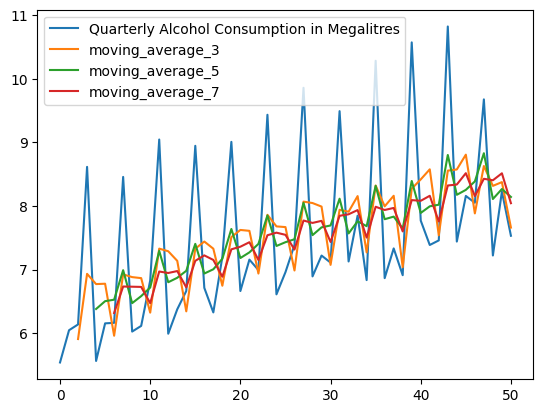

In [123]:
df.plot()


<Axes: title={'center': 'Demand'}>

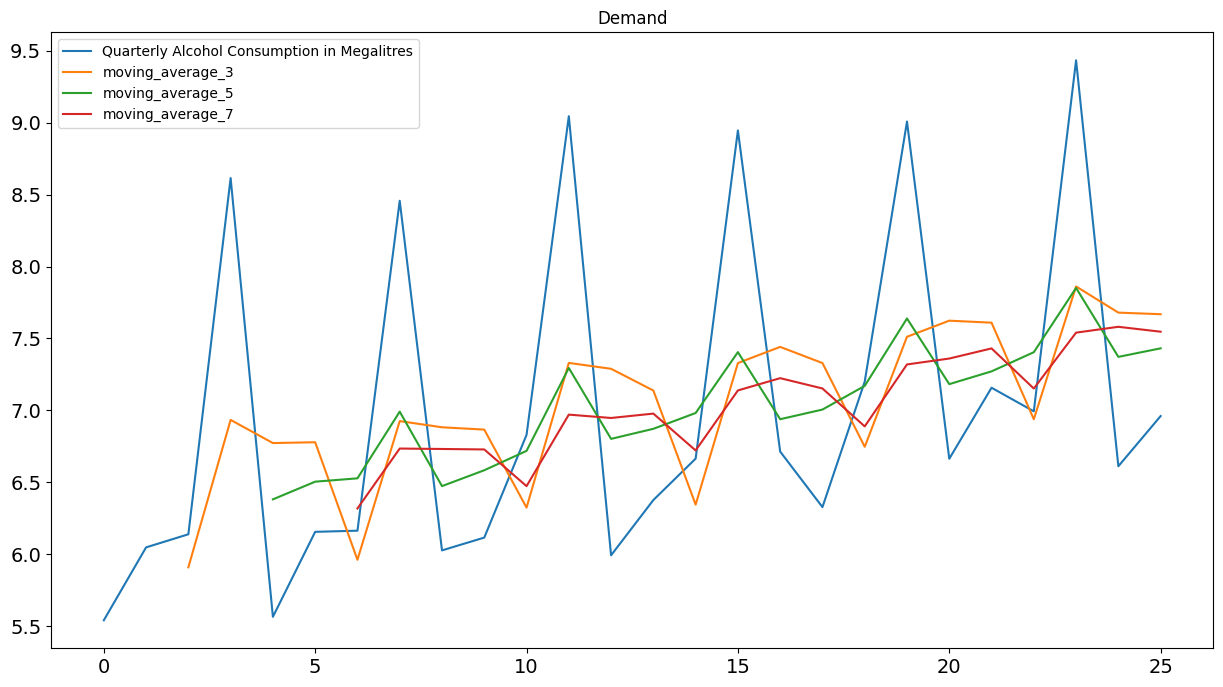

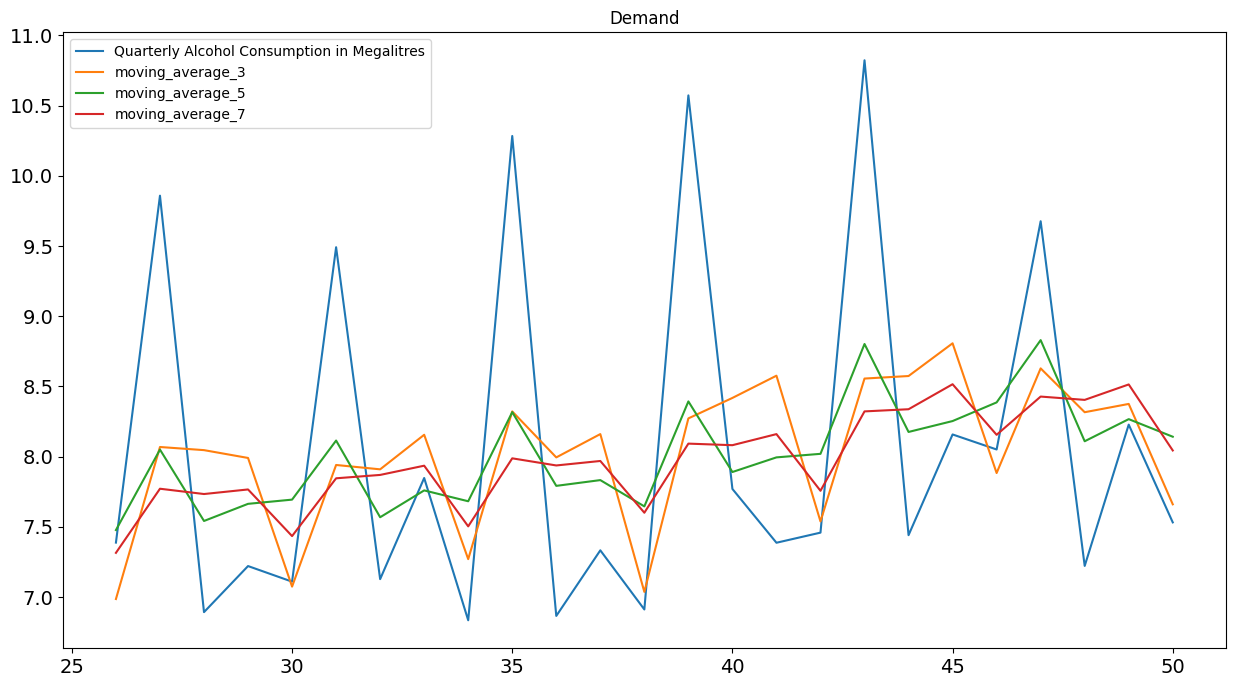

In [124]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'Demand', fontsize=14)
test.plot(figsize=(15,8), title= 'Demand', fontsize=14)


In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

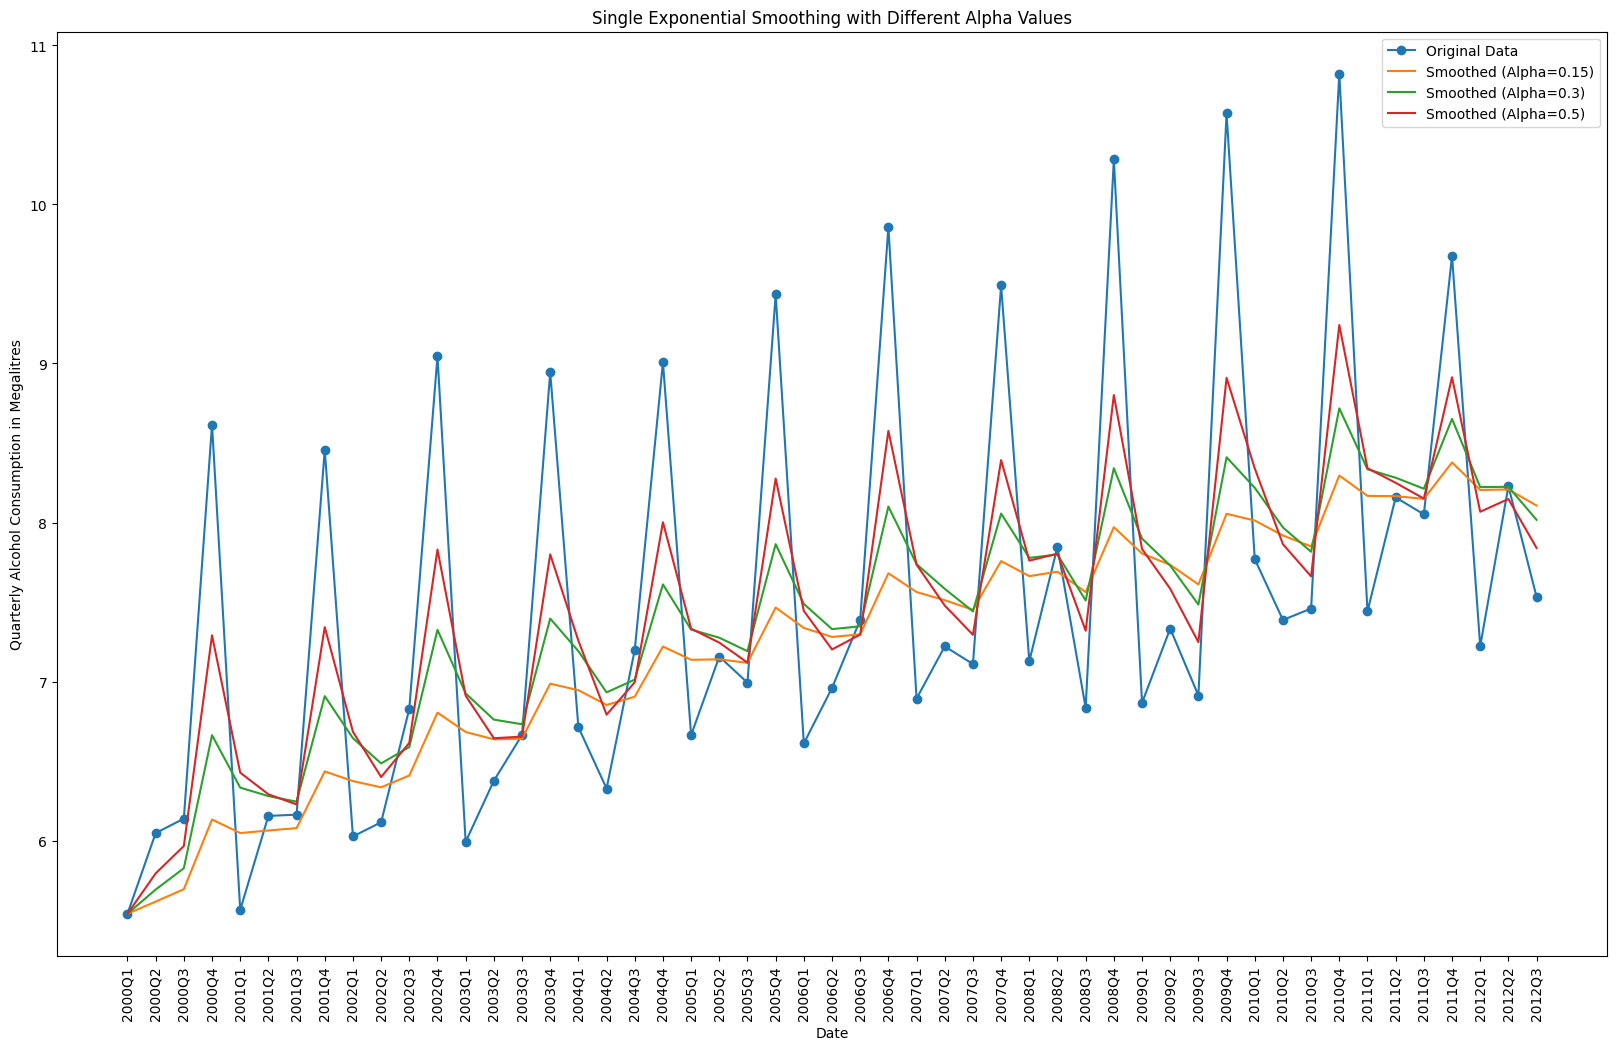

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Function for single exponential smoothing
def single_exp_smoothing(series, alpha):
    result = [series[0]]  # Initialize the result with the first value
    for i in range(1, len(series)):
        result.append(alpha * series[i] + (1 - alpha) * result[i-1])
    return result

# Apply single exponential smoothing for different alpha values
alpha_values = [0.15, 0.3, 0.5]

for alpha in alpha_values:
    df[f'smoothed_alpha_{alpha}'] = single_exp_smoothing(df['Quarterly Alcohol Consumption in Megalitres'], alpha)

# Plot the original data and smoothed data for different alpha values
plt.figure(figsize=(20, 12))
plt.plot(df['DATE'], df['Quarterly Alcohol Consumption in Megalitres'], label='Original Data', marker='o')
for alpha in alpha_values:
    plt.plot(df['DATE'], df[f'smoothed_alpha_{alpha}'], label=f'Smoothed (Alpha={alpha})')
plt.title('Single Exponential Smoothing with Different Alpha Values')
plt.xlabel('Date')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.xticks(rotation=90)
plt.show()


<ipython-input-127-46c9924f80d3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ses_predictions'] = result.forecast(len(test))


SES MAE: 1.16
SES MSE: 1.66
SES RMSE: 1.29
SES MAPE: 14.21%
Prediction Accuracy: 85.79%


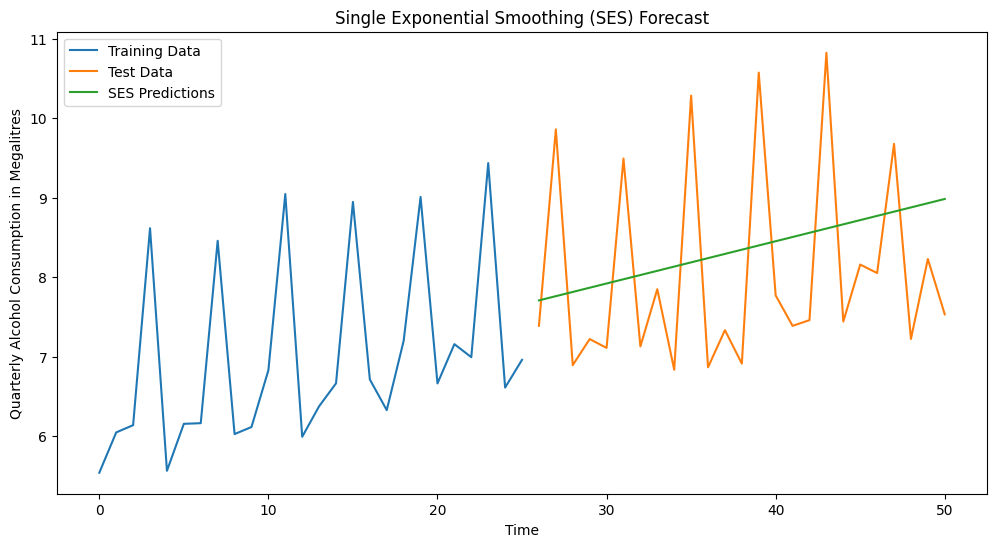

In [127]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Train-Test Split
train = df.iloc[:-25]
test = df.iloc[-25:]

# 2. Fit the Model
# Fit the Single Exponential Smoothing model (without seasonal component)
model = ExponentialSmoothing(train['Quarterly Alcohol Consumption in Megalitres'], trend='add')
result = model.fit()

# 3. Make Predictions
test['ses_predictions'] = result.forecast(len(test))

# 4. Calculate Metrics
mae_ses = mean_absolute_error(test['Quarterly Alcohol Consumption in Megalitres'], test['ses_predictions'])
mse_ses = mean_squared_error(test['Quarterly Alcohol Consumption in Megalitres'], test['ses_predictions'])
rmse_ses = np.sqrt(mse_ses)

# 5. Calculate MAPE
mape_ses = np.mean(np.abs((test['Quarterly Alcohol Consumption in Megalitres'] - test['ses_predictions']) / test['Quarterly Alcohol Consumption in Megalitres'])) * 100

print("SES MAE: {:.2f}".format(mae_ses))
print("SES MSE: {:.2f}".format(mse_ses))
print("SES RMSE: {:.2f}".format(rmse_ses))
print("SES MAPE: {:.2f}%".format(mape_ses))

# 6. Calculate Prediction Accuracy
prediction_accuracy = 100 - mape_ses

print("Prediction Accuracy: {:.2f}%".format(prediction_accuracy))

# 7. Plot
plt.figure(figsize=(12, 6))
plt.plot(train['Quarterly Alcohol Consumption in Megalitres'], label='Training Data')
plt.plot(test['Quarterly Alcohol Consumption in Megalitres'], label='Test Data')
plt.plot(test['ses_predictions'], label='SES Predictions')
plt.title('Single Exponential Smoothing (SES) Forecast')
plt.xlabel('Time')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.show()


In [128]:
df.head(20)

,DATE,Quarterly Alcohol Consumption in Megalitres,moving_average_3,moving_average_5,moving_average_7,smoothed_alpha_0.15,smoothed_alpha_0.3,smoothed_alpha_0.5
0,2000Q1,5.540,NaN,NaN,NaN,5.540000,5.540000,5.540000
1,2000Q2,6.047,NaN,NaN,NaN,5.616050,5.692100,5.793500
2,2000Q3,6.138,5.908333,NaN,NaN,5.694342,5.825870,5.965750
3,2000Q4,8.615,6.933333,NaN,NaN,6.132441,6.662609,7.290375
4,2001Q1,5.564,6.772333,6.3808,NaN,6.047175,6.333026,6.427188
5,2001Q2,6.155,6.778000,6.5038,NaN,6.063349,6.279618,6.291094
6,2001Q3,6.163,5.960667,6.5270,6.317429,6.078296,6.244633,6.227047
7,2001Q4,8.457,6.925000,6.9908,6.734143,6.435102,6.908343,7.342023
8,2002Q1,6.026,6.882000,6.4730,6.731143,6.373737,6.643640,6.684012
9,2002Q2,6.115,6.866000,6.5832,6.727857,6.334926,6.485048,6.399506


# Double Exponential Smoothing(holtwinters)

In [129]:
!pip install statsmodels

<ipython-input-130-3f08d2bfc52b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['holt_winters'] = result.forecast(len(test))


Holt-Winters MAE: 0.39
Holt-Winters MSE: 0.24
Holt-Winters RMSE: 0.49
Holt-Winters MAPE: 5.01%
Holt-Winters Prediction Accuracy: 94.99%


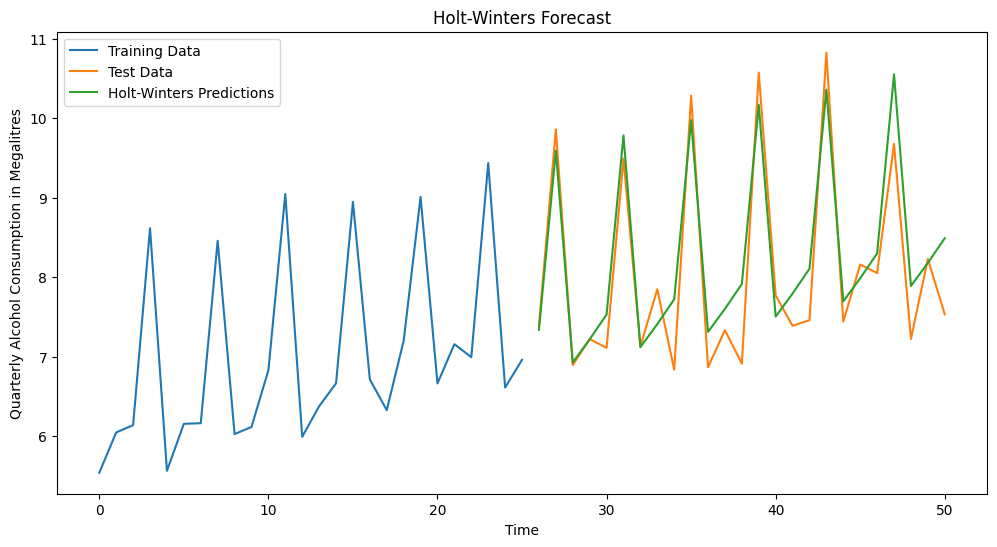

In [130]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Train-Test Split
train = df.iloc[:-25]
test = df.iloc[-25:]

# 2. Fit the Model
# Fit the Holt-Winters (Double Exponential Smoothing) model
model = ExponentialSmoothing(train['Quarterly Alcohol Consumption in Megalitres'], trend='add', seasonal='add', seasonal_periods=4)
result = model.fit()

# 3. Make Predictions
test['holt_winters'] = result.forecast(len(test))

# 4. Calculate Metrics
mae_hw = mean_absolute_error(test['Quarterly Alcohol Consumption in Megalitres'], test['holt_winters'])
mse_hw = mean_squared_error(test['Quarterly Alcohol Consumption in Megalitres'], test['holt_winters'])
rmse_hw = np.sqrt(mse_hw)

# 5. Calculate MAPE
mape_hw = np.mean(np.abs((test['Quarterly Alcohol Consumption in Megalitres'] - test['holt_winters']) / test['Quarterly Alcohol Consumption in Megalitres'])) * 100

# 6. Calculate Prediction Accuracy
prediction_accuracy_hw = 100 - mape_hw

print("Holt-Winters MAE: {:.2f}".format(mae_hw))
print("Holt-Winters MSE: {:.2f}".format(mse_hw))
print("Holt-Winters RMSE: {:.2f}".format(rmse_hw))
print("Holt-Winters MAPE: {:.2f}%".format(mape_hw))
print("Holt-Winters Prediction Accuracy: {:.2f}%".format(prediction_accuracy_hw))

# 7. Plot
plt.figure(figsize=(12, 6))
plt.plot(train['Quarterly Alcohol Consumption in Megalitres'], label='Training Data')
plt.plot(test['Quarterly Alcohol Consumption in Megalitres'], label='Test Data')
plt.plot(test['holt_winters'], label='Holt-Winters Predictions')
plt.title('Holt-Winters Forecast')
plt.xlabel('Time')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.show()


The Holt-Winters model exhibits superior forecasting accuracy compared to the Simple Exponential Smoothing (SES) model, as evidenced by its lower error metrics. Specifically, the Holt-Winters model demonstrates a MAE of 0.39, MSE of 0.24, and RMSE of 0.49, which are significantly lower than the corresponding values for the SES model. Additionally, the Holt-Winters model boasts a lower MAPE of 5.01% and a higher prediction accuracy of 94.99% compared to the SES model's MAPE of 14.21% and prediction accuracy of 85.79%. Therefore, based on these metrics, the Holt-Winters model is deemed to be more effective in capturing underlying patterns and trends, making it the preferred choice for forecasting in this scenario.

In [131]:
df.head(20)

,DATE,Quarterly Alcohol Consumption in Megalitres,moving_average_3,moving_average_5,moving_average_7,smoothed_alpha_0.15,smoothed_alpha_0.3,smoothed_alpha_0.5
0,2000Q1,5.540,NaN,NaN,NaN,5.540000,5.540000,5.540000
1,2000Q2,6.047,NaN,NaN,NaN,5.616050,5.692100,5.793500
2,2000Q3,6.138,5.908333,NaN,NaN,5.694342,5.825870,5.965750
3,2000Q4,8.615,6.933333,NaN,NaN,6.132441,6.662609,7.290375
4,2001Q1,5.564,6.772333,6.3808,NaN,6.047175,6.333026,6.427188
5,2001Q2,6.155,6.778000,6.5038,NaN,6.063349,6.279618,6.291094
6,2001Q3,6.163,5.960667,6.5270,6.317429,6.078296,6.244633,6.227047
7,2001Q4,8.457,6.925000,6.9908,6.734143,6.435102,6.908343,7.342023
8,2002Q1,6.026,6.882000,6.4730,6.731143,6.373737,6.643640,6.684012
9,2002Q2,6.115,6.866000,6.5832,6.727857,6.334926,6.485048,6.399506


The Holt-Winters model demonstrates superior performance compared to the SES
model across all error metrics (MAE, MSE, RMSE, and MAPE).
The Holt-Winters model achieves significantly lower error values, indicating better accuracy in forecasting the Quarterly Alcohol Consumption in Megalitres.
Specifically, the MAPE for Holt-Winters is substantially lower at 5.01%, suggesting that its predictions are closer to the actual values compared to SES with a MAPE of 14.21%.

In [154]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Define the create_lstm_model function
def create_lstm_model(optimizer='rmsprop'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer=optimizer)
    return model

# Load your DataFrame df and preprocess it if needed
# Assuming df contains the required data

# Perform any preprocessing steps if needed, such as normalization
scaler = MinMaxScaler()
df['Quarterly Alcohol Consumption in Megalitres'] = scaler.fit_transform(df[['Quarterly Alcohol Consumption in Megalitres']])

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 12
X_train, y_train = create_sequences(train[['Quarterly Alcohol Consumption in Megalitres']].values, sequence_length)
X_test, y_test = create_sequences(test[['Quarterly Alcohol Consumption in Megalitres']].values, sequence_length)

# Define and train the LSTM model
model = create_lstm_model(optimizer='rmsprop')
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions to get actual values
train_predictions_inv = scaler.inverse_transform(train_predictions)
test_predictions_inv = scaler.inverse_transform(test_predictions)

# Calculate MAE, MSE, RMSE for train and test
train_mae = mean_absolute_error(train.iloc[sequence_length:, 0], train_predictions_inv[:, 0])
test_mae = mean_absolute_error(test.iloc[sequence_length:, 0], test_predictions_inv[:, 0])

train_mse = mean_squared_error(train.iloc[sequence_length:, 0], train_predictions_inv[:, 0])
test_mse = mean_squared_error(test.iloc[sequence_length:, 0], test_predictions_inv[:, 0])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print metrics
print("Metrics for LSTM Model:")
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length:train_size], train_predictions_inv[:, 0], label='Train Predictions')
plt.plot(df.index[train_size + sequence_length:], test_predictions_inv[:, 0], label='Test Predictions')
plt.plot(df.index, df['Quarterly Alcohol Consumption in Megalitres'], label='Original Data')
plt.title('Quarterly Alcohol Consumption in Megalitres Prediction')
plt.xlabel('Date')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.show()


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.3426 - val_loss: 0.3770
Epoch 2/100
1/1 [==============================] - 0s 90ms/step - loss: 0.2598 - val_loss: 0.2986
Epoch 3/100
1/1 [==============================] - 0s 88ms/step - loss: 0.1991 - val_loss: 0.2475
Epoch 4/100
1/1 [==============================] - 0s 81ms/step - loss: 0.1590 - val_loss: 0.2336
Epoch 5/100
1/1 [==============================] - 0s 75ms/step - loss: 0.1521 - val_loss: 0.2343
Epoch 6/100
1/1 [==============================] - 0s 64ms/step - loss: 0.1519 - val_loss: 0.2349
Epoch 7/100
1/1 [==============================] - 0s 90ms/step - loss: 0.1516 - val_loss: 0.2356
Epoch 8/100
1/1 [==============================] - 0s 83ms/step - loss: 0.1514 - val_loss: 0.2364
Epoch 9/100
1/1 [==============================] - 0s 92ms/step - loss: 0.1512 - val_loss: 0.2371
Epoch 10/100
1/1 [==============================] - 0s 55ms/step - loss: 0.1510 - val_loss: 0.2342
Epoch 11/100
1/1 [===

ValueError: Expected input data to be non-empty.

# **ARIMA Analysis**

In [155]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [169]:
df1 = pd.read_csv('/content/NZ_Alcohol_Consumption.csv')
df1.head()

,DATE,Quarterly Alcohol Consumption in Megalitres
0,2000Q1,5.540
1,2000Q2,6.047
2,2000Q3,6.138
3,2000Q4,8.615
4,2001Q1,5.564


In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   DATE                                         51 non-null     object 
 1   Quarterly Alcohol Consumption in Megalitres  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


In [171]:
df1.describe()

,Quarterly Alcohol Consumption in Megalitres
count,51.000000
mean,7.514137
std,1.317691
min,5.540000
25%,6.663500
50%,7.199000
75%,8.193000
max,10.822000


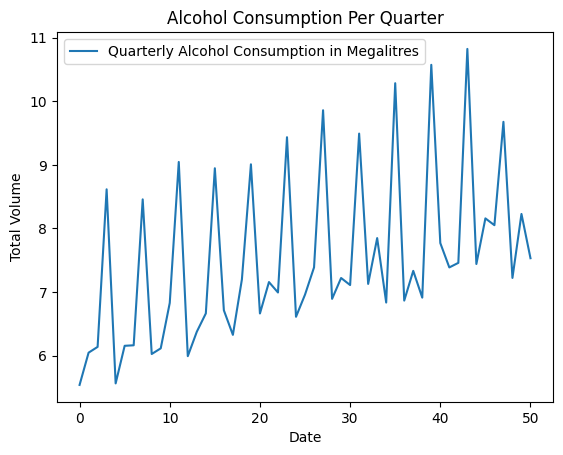

In [172]:
# Plot the time series
df1.plot()
plt.title('Alcohol Consumption Per Quarter')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.show()

The graph exhibits a non cyclicality trend. Because, the data shows repeating patterns of peaks and troughs. However, there is no fixed period for these repetitions.
Unlike seasonality, which follows regular intervals (e.g., yearly, monthly), cyclicality lacks a predictable cycle length.

In [162]:
!pip install pandas
!pip install statsmodels

import pandas as pd
import statsmodels.tsa.seasonal as seasonal_decompose
import matplotlib.pyplot as plt

In [173]:
decompose = sm.tsa.seasonal_decompose(df1['Quarterly Alcohol Consumption in Megalitres'], period=12, model='multiplicative')

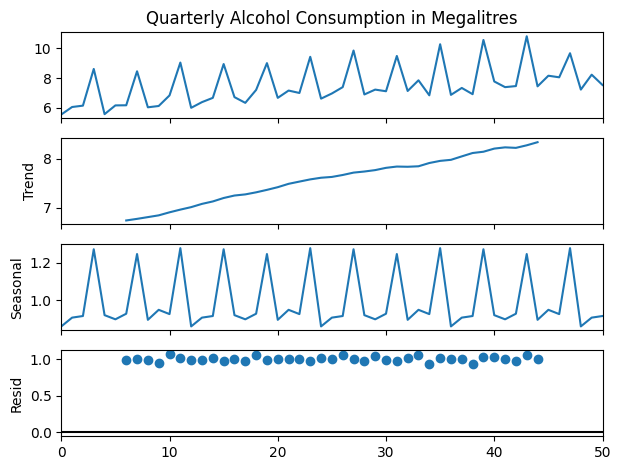

In [174]:
# Plot decomposition
decompose.plot()
plt.show()

In [175]:
# Run Dicky-Fuller test
result = adfuller(df1['Quarterly Alcohol Consumption in Megalitres'])

# Print test statistic
print("Test statistic = {:.3f}".format(result[0]))
print("P-value = {:.3f}".format(result[1]))
print("Critical values :")
for k, v in result[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<result[0] else "", 100-int(k[:-1])))

Test statistic = -1.661
P-value = 0.451
Critical values :
	1%: -3.5925042342183704 - The data is not stationary with 99% confidence
	5%: -2.931549768951162 - The data is not stationary with 95% confidence
	10%: -2.60406594375338 - The data is not stationary with 90% confidence


In [177]:
#Dropping the column
df1 = df1.drop('DATE', axis=1)

<Axes: >

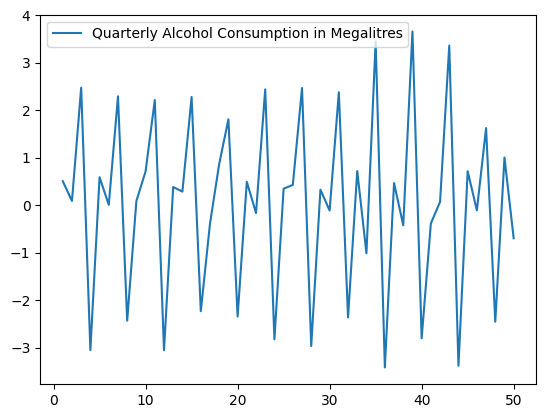

In [178]:
## Transforming to stationary by means of differencing
df1_diff = df1.diff().dropna()
df1_diff.plot()

In [179]:
adf_test_1 = adfuller(df1_diff)
print(f'p-value:{adf_test_1[1]}')

p-value:0.010113209242478669


Since the p-value is less than 0.05, it is stationary.

# Using Autocorrelation Function ACF and Partial Autocorrelation Function PACF.

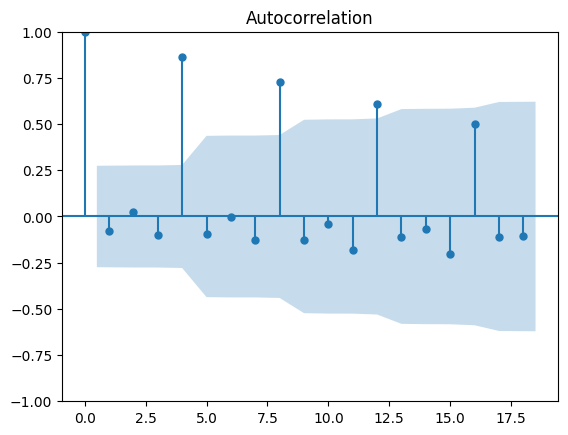

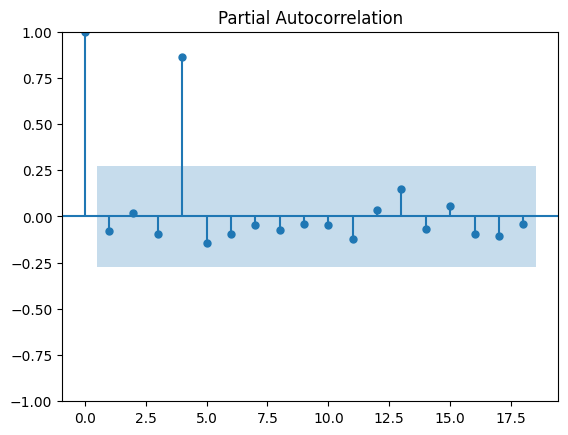

In [181]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(df['Quarterly Alcohol Consumption in Megalitres'])
plt.show()

# Plot PACF
plot_pacf(df['Quarterly Alcohol Consumption in Megalitres'])
plt.show()

                                            SARIMAX Results                                            
Dep. Variable:     Quarterly Alcohol Consumption in Megalitres   No. Observations:                   51
Model:                                          ARIMA(1, 0, 5)   Log Likelihood                 -55.986
Date:                                         Thu, 15 Feb 2024   AIC                            127.973
Time:                                                 21:59:39   BIC                            143.428
Sample:                                                      0   HQIC                           133.879
                                                          - 51                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const     

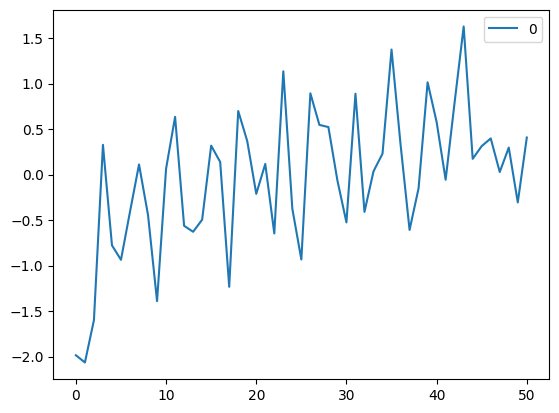

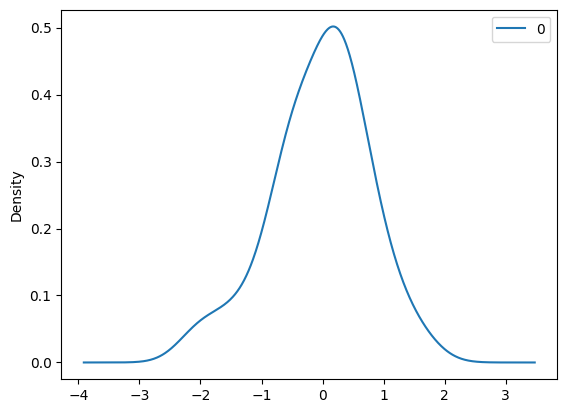

               0
count  51.000000
mean   -0.047244
std     0.791220
min    -2.064419
25%    -0.509741
50%     0.065327
75%     0.403342
max     1.628693


In [184]:
# fit an ARIMA model and plot residual errors
model = ARIMA(df['Quarterly Alcohol Consumption in Megalitres'], order=(1,0,5))
results = model.fit()

# summary of fit model
print(results.summary())

# line plot of residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

In [185]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]

# Print best estimate predictions
print(mean_forecast)

39    9.557412
40    7.191285
41    7.442644
42    6.659761
43    9.193307
44    7.266716
45    7.844125
46    7.652609
47    9.646841
48    6.924285
49    8.532876
50    7.123707
Name: predicted_mean, dtype: float64


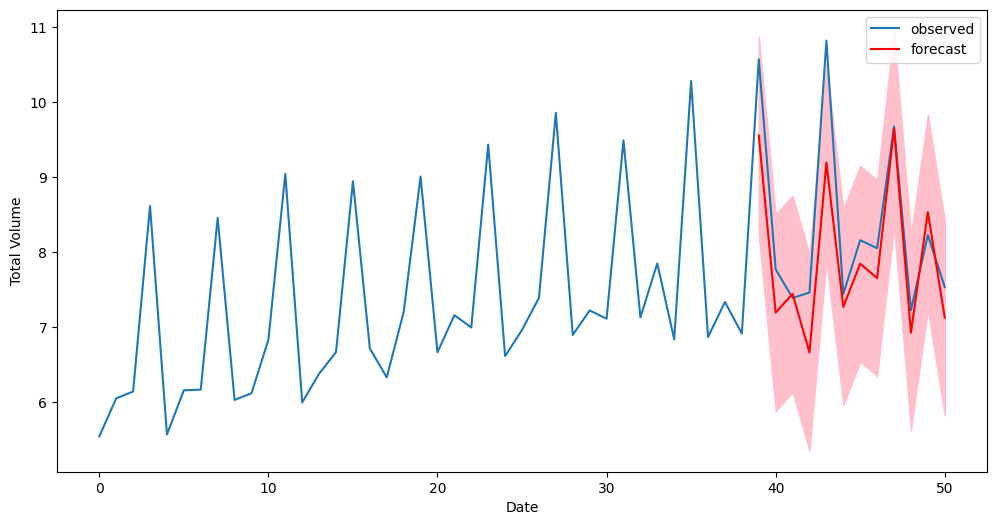

In [187]:
# plot the  data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Quarterly Alcohol Consumption in Megalitres'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.legend()
plt.show()

ARIMA MAE: 0.15
ARIMA MSE: 0.04
ARIMA RMSE: 0.19
ARIMA MAPE: 29.84%
ARIMA Prediction Accuracy: 70.16%


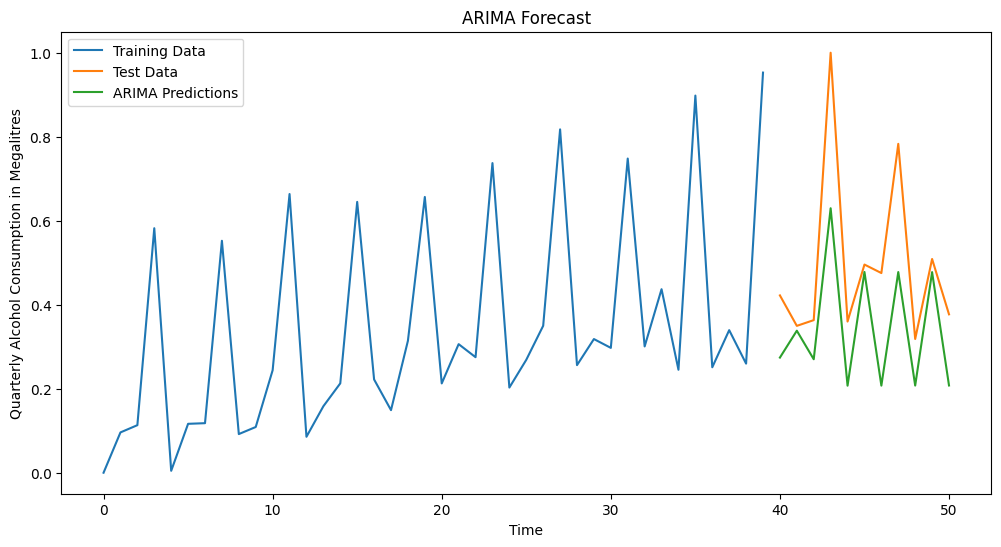

In [209]:
from statsmodels.tsa.arima.model import ARIMA

# 2. Fit the Model
# Fit the ARIMA model
model_arima = ARIMA(train['Quarterly Alcohol Consumption in Megalitres'], order=(1, 0, 5))
result_arima = model_arima.fit()

# 3. Make Predictions
test['arima_forecast'] = result_arima.forecast(steps=len(test))

# 4. Calculate Metrics
mae_arima = mean_absolute_error(test['Quarterly Alcohol Consumption in Megalitres'], test['arima_forecast'])
mse_arima = mean_squared_error(test['Quarterly Alcohol Consumption in Megalitres'], test['arima_forecast'])
rmse_arima = np.sqrt(mse_arima)

# 5. Calculate MAPE
mape_arima = np.mean(np.abs((test['Quarterly Alcohol Consumption in Megalitres'] - test['arima_forecast']) / test['Quarterly Alcohol Consumption in Megalitres'].replace(0, np.nan))) * 100

# 6. Calculate Prediction Accuracy
prediction_accuracy_arima = 100 - mape_arima

# Print the metrics
print("ARIMA MAE: {:.2f}".format(mae_arima))
print("ARIMA MSE: {:.2f}".format(mse_arima))
print("ARIMA RMSE: {:.2f}".format(rmse_arima))
print("ARIMA MAPE: {:.2f}%".format(mape_arima))
print("ARIMA Prediction Accuracy: {:.2f}%".format(prediction_accuracy_arima))

# 7. Plot
plt.figure(figsize=(12, 6))
plt.plot(train['Quarterly Alcohol Consumption in Megalitres'], label='Training Data')
plt.plot(test['Quarterly Alcohol Consumption in Megalitres'], label='Test Data')
plt.plot(test['arima_forecast'], label='ARIMA Predictions')
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.show()


# Generating Dynamic Predictions

In [201]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]

# Print best estimate predictions
print(mean_forecast)

39    9.557412
40    7.152816
41    7.629409
42    6.737195
43    8.179788
44    6.870219
45    8.179703
46    6.870303
47    8.179619
48    6.870388
49    8.179534
50    6.870473
Name: predicted_mean, dtype: float64


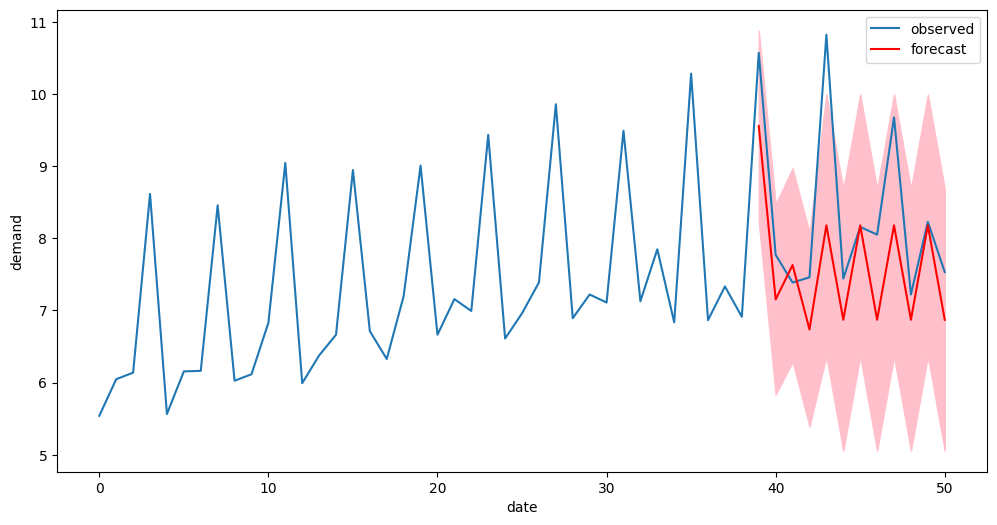

In [202]:
# plot the  data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('date')
plt.ylabel('demand')
plt.legend()
plt.show()

In [208]:
# Evaluate model with RMSE
rmse = np.sqrt(mean_squared_error(actual_values, mean_forecast))
print('RMSE: %.3f' % rmse)

RMSE: 1.060


# Out of the Sample Predictions (12 periods ahead)

In [194]:
# Deducing the Out of sample predictions
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]

# Print best estimate predictions
print(mean_forecast)

51    8.338404
52    7.013781
53    7.935667
54    7.240155
55    8.181868
56    6.868139
57    8.181783
58    6.868224
59    8.181698
60    6.868309
61    8.181613
62    6.868394
Name: predicted_mean, dtype: float64


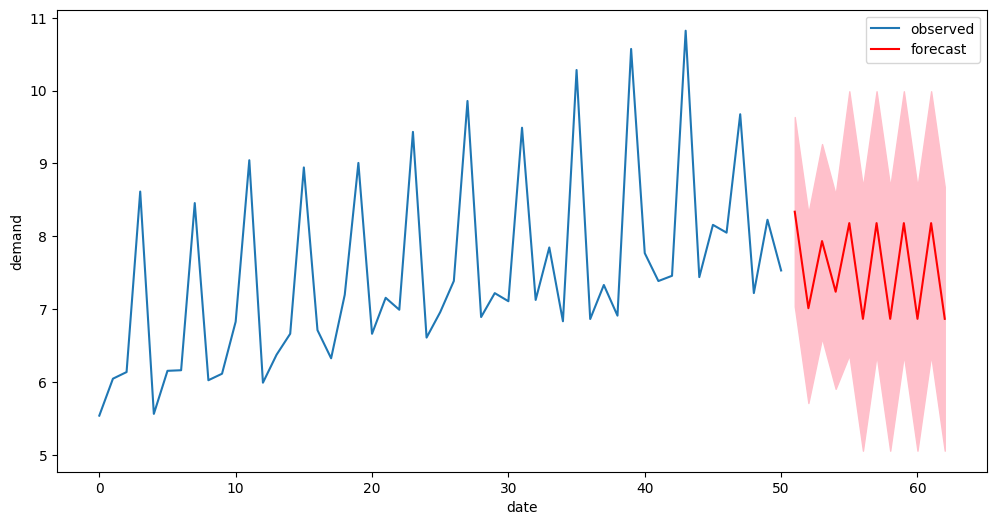

In [195]:
# plot the  data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('date')
plt.ylabel('demand')
plt.legend()
plt.show()

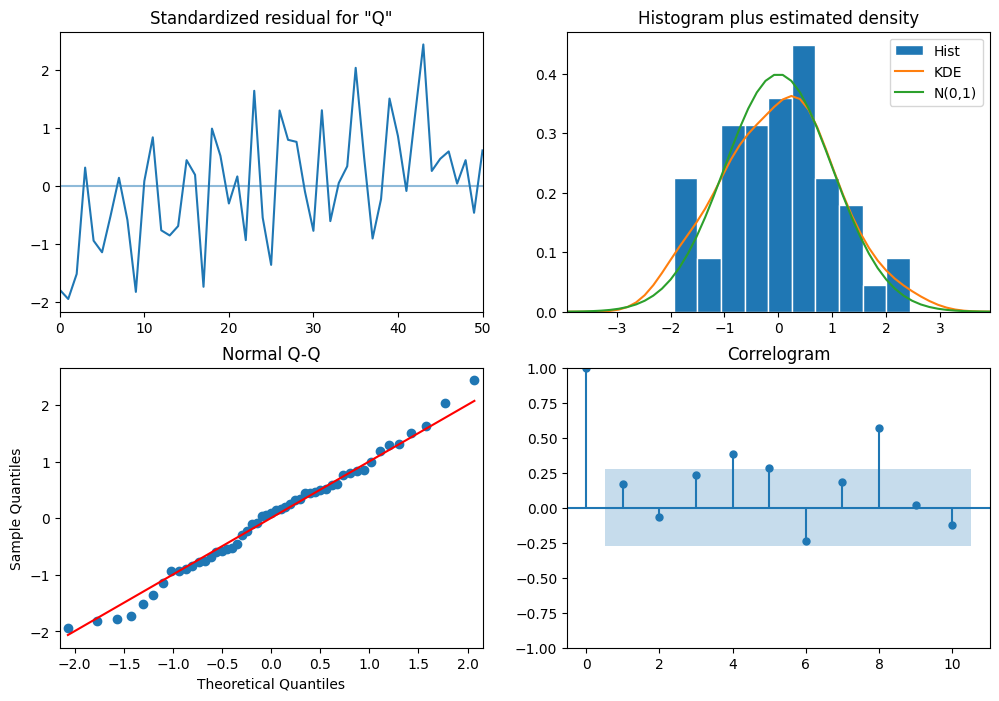

In [196]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(12,8))
plt.show()

## LSTM Prediction

In [210]:
df2 = pd.read_csv('/content/NZ_Alcohol_Consumption.csv')

<Axes: >

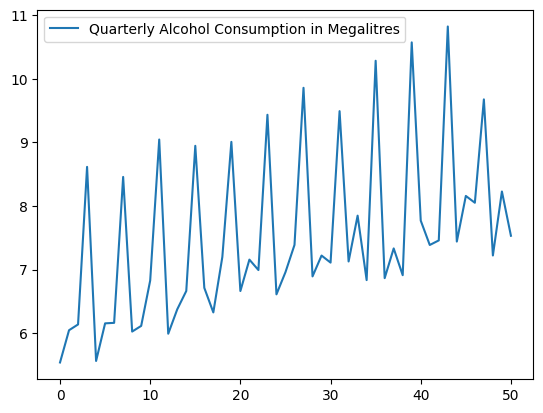

In [211]:
df2.plot()

In [216]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df2['Quarterly Alcohol Consumption in Megalitres'] = scaler.fit_transform(df2[['Quarterly Alcohol Consumption in Megalitres']])

# Split data for train and test
train_size = int(len(df2) * 0.8)
train, test = df2[:train_size], df2[train_size:]

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 6
X_train, y_train = create_sequences(train['Quarterly Alcohol Consumption in Megalitres'].values, sequence_length)
X_test, y_test = create_sequences(test['Quarterly Alcohol Consumption in Megalitres'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.3440 - val_loss: 0.3592
Epoch 2/200
1/1 [==============================] - 0s 38ms/step - loss: 0.2885 - val_loss: 0.3076
Epoch 3/200
1/1 [==============================] - 0s 38ms/step - loss: 0.2487 - val_loss: 0.2646
Epoch 4/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2190 - val_loss: 0.2270
Epoch 5/200
1/1 [==============================] - 0s 42ms/step - loss: 0.1981 - val_loss: 0.2067
Epoch 6/200
1/1 [==============================] - 0s 39ms/step - loss: 0.1847 - val_loss: 0.1982
Epoch 7/200
1/1 [==============================] - 0s 41ms/step - loss: 0.1768 - val_loss: 0.1980
Epoch 8/200
1/1 [==============================] - 0s 50ms/step - loss: 0.1737 - val_loss: 0.1978
Epoch 9/200
1/1 [==============================] - 0s 51ms/step - loss: 0.1728 - val_loss: 0.1976
Epoch 10/200
1/1 [==============================] - 0s 42ms/step - loss: 0.1725 - val_loss: 0.1974
Epoch 11/200
1/1 [===

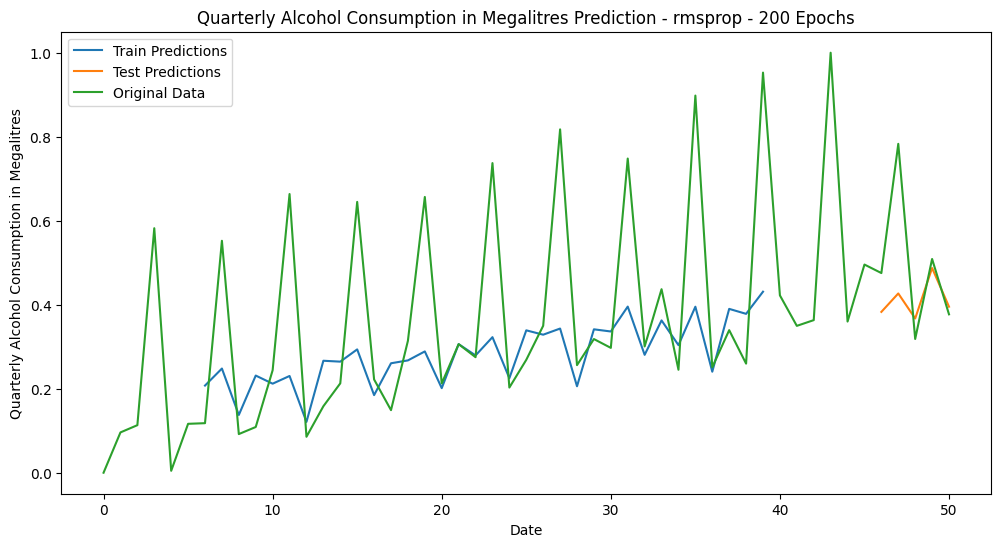

Metrics for rmsprop - 200 Epochs:
Train MSE: 0.07161725132117105
Test MSE: 0.0340265707455724
Train MAE: 0.19209163295388107
Test MAE: 0.13371655941641458
Train RMSE: 0.26761399687081217
Test RMSE: 0.18446292512473178
Train MAPE: 58.11%
Test MAPE: 24.09%
Train Prediction Accuracy: 41.89%
Test Prediction Accuracy: 75.91%


In [217]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the LSTM model with rmsprop optimizer
model = create_lstm_model(optimizer='rmsprop')

# Train the model with 200 epochs
epochs = 200
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=1)

# Find predictions for train and test
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Visualize actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df2.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
plt.plot(df2.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
plt.plot(df2.index, df2['Quarterly Alcohol Consumption in Megalitres'], label='Original Data')
plt.title(f'Quarterly Alcohol Consumption in Megalitres Prediction - rmsprop - {epochs} Epochs')
plt.xlabel('Date')
plt.ylabel('Quarterly Alcohol Consumption in Megalitres')
plt.legend()
plt.show()

# Evaluate performance with metrics (e.g., Mean Squared Error)
train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]))
test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]))
train_mae = np.mean(np.abs(scaler.inverse_transform(train_predictions) - train['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]))
test_mae = np.mean(np.abs(scaler.inverse_transform(test_predictions) - test['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]))
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate MAPE for train and test
train_mape = np.mean(np.abs((scaler.inverse_transform(train_predictions) - train['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]) / train['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:])) * 100
test_mape = np.mean(np.abs((scaler.inverse_transform(test_predictions) - test['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:]) / test['Quarterly Alcohol Consumption in Megalitres'].values[sequence_length:])) * 100

# Calculate Prediction Accuracy for train and test
train_prediction_accuracy = 100 - train_mape
test_prediction_accuracy = 100 - test_mape

# Print the metrics
print(f'Metrics for rmsprop - {epochs} Epochs:')
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')
print(f'Train Prediction Accuracy: {train_prediction_accuracy:.2f}%')
print(f'Test Prediction Accuracy: {test_prediction_accuracy:.2f}%')
